In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
%matplotlib inline
import networkx as nx

Загружаем данные по тройкам. Данные хранятся в формате .xlsx, для работы с ними используем модуль pandas. **Pandas** (Python Data Analysis Library) — библиотека языка Python для [удобных] обработки и анализа данных. Загрузка данных в **pandas** происходит в специальный объект типа **DataFrame**:

In [4]:
dt=pd.read_excel('eng_rat.xlsx') # for rat test with words in G
print(dt)

       Word1     Word2     Word3    Answer  2s_acc  7s_acc  7s_st  7s_sd  \
0    cottage     swiss      cake    cheese      52      84   3.28   1.25   
1      cream     skate     water       ice      34      76   3.42   1.16   
2      loser    throat      spot      sore      22      61   4.19   1.49   
3       show      life       row      boat      31      72   4.42   1.44   
4      night     wrist      stop     watch      38      65   4.33   1.31   
5       duck      fold    dollar      bill      31      69   4.33   1.25   
7        dew      comb       bee     honey      30      66   4.24   1.50   
10       aid    rubber     wagon      band      22      56   4.21   1.50   
12   cracker       fly   fighter      fire      17      45   4.95   1.54   
13    safety   cushion     point       pin      24      51   3.91   1.58   
15     dream     break     light       day      24      56   4.36   1.49   
16      fish      mine      rush      gold      17      46   4.27   1.09   
18   measure

Как видно, данные представляют из себя таблицу, где строка — объект, столбец — признак. Для экономии места можно выводить заданное количество первых строк объекта при помощи метода head():

In [5]:
dt.head(10)

,Word1,Word2,Word3,Answer,2s_acc,7s_acc,7s_st,7s_sd,15s_acc,15s_st,15s_sd,30s_acc,30s_st,30s_sd,IN_G
0,cottage,swiss,cake,cheese,52,84,3.28,1.25,96,3.96,2.37,64.0,10.85,7.04,True
1,cream,skate,water,ice,34,76,3.42,1.16,92,4.04,1.87,90.0,4.12,3.58,True
2,loser,throat,spot,sore,22,61,4.19,1.49,86,5.38,3.02,82.0,6.31,4.06,True
3,show,life,row,boat,31,72,4.42,1.44,82,5.67,2.34,79.0,10.30,7.22,True
4,night,wrist,stop,watch,38,65,4.33,1.31,82,6.00,3.00,97.0,6.27,5.83,True
5,duck,fold,dollar,bill,31,69,4.33,1.25,80,6.05,2.82,92.0,6.58,4.28,True
7,dew,comb,bee,honey,30,66,4.24,1.50,80,5.63,3.15,100.0,4.12,2.14,True
10,aid,rubber,wagon,band,22,56,4.21,1.50,75,5.41,2.15,69.0,6.51,4.62,True
12,cracker,fly,fighter,fire,17,45,4.95,1.54,68,5.91,2.54,85.0,6.12,3.87,True
13,safety,cushion,point,pin,24,51,3.91,1.58,66,5.83,2.78,74.0,5.00,2.84,True


По данным можно индексироваться при помощи номеров строк/столбцов или названий признаков:

In [6]:
dt[2:5]

,Word1,Word2,Word3,Answer,2s_acc,7s_acc,7s_st,7s_sd,15s_acc,15s_st,15s_sd,30s_acc,30s_st,30s_sd,IN_G
2,loser,throat,spot,sore,22,61,4.19,1.49,86,5.38,3.02,82.0,6.31,4.06,True
3,show,life,row,boat,31,72,4.42,1.44,82,5.67,2.34,79.0,10.30,7.22,True
4,night,wrist,stop,watch,38,65,4.33,1.31,82,6.00,3.00,97.0,6.27,5.83,True


In [9]:
dt.iloc[1:5, 0:4]

,Word1,Word2,Word3,Answer
1,cream,skate,water,ice
2,loser,throat,spot,sore
3,show,life,row,boat
4,night,wrist,stop,watch


In [10]:
dt[['Word1', 'Word2', 'Word3','Answer','15s_acc']].head()

,Word1,Word2,Word3,Answer,15s_acc
0,cottage,swiss,cake,cheese,96
1,cream,skate,water,ice,92
2,loser,throat,spot,sore,86
3,show,life,row,boat,82
4,night,wrist,stop,watch,82


Постмотрим на распределение числа верно ответивших на тест за 15 секунд:

Text(0.5,0,' accuracy 15 sec')

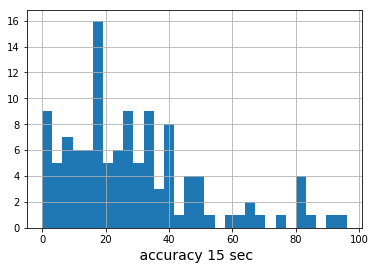

In [11]:
dt['15s_acc'].hist(bins = 30)
plt.xlabel(' accuracy 15 sec', fontsize=14)

И распределение времен ответа:

Text(0.5,0,' accuracy 15 sec')

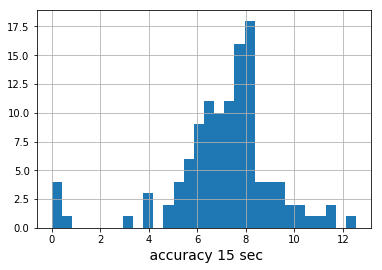

In [12]:
dt['15s_st'].hist(bins = 30)
plt.xlabel(' accuracy 15 sec', fontsize=14)

Есть ли корреляция между точностью решения задачи и временем?

Text(0,0.5,' answer time')

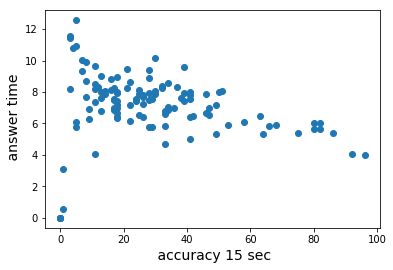

In [26]:
plt.scatter(dt['15s_acc'],dt['15s_st'])
plt.xlabel(' accuracy 15 sec', fontsize=14)
plt.ylabel(' answer time', fontsize=14)

Определим сложность теста по проценту решивших тест верно:

In [28]:
y=[]
for row in dt.itertuples(): # Iterate over DataFrame
    acc=row._9
    if(acc<=32.0): 
        y.append(0)
    else: 
        if(acc<=64.0): 
            y.append(1)
        else: y.append(2)
dt['Comp']=y 

dt.head()

,Word1,Word2,Word3,Answer,2s_acc,7s_acc,7s_st,7s_sd,15s_acc,15s_st,15s_sd,30s_acc,30s_st,30s_sd,IN_G,Comp
0,cottage,swiss,cake,cheese,52,84,3.28,1.25,96,3.96,2.37,64.0,10.85,7.04,True,2
1,cream,skate,water,ice,34,76,3.42,1.16,92,4.04,1.87,90.0,4.12,3.58,True,2
2,loser,throat,spot,sore,22,61,4.19,1.49,86,5.38,3.02,82.0,6.31,4.06,True,2
3,show,life,row,boat,31,72,4.42,1.44,82,5.67,2.34,79.0,10.30,7.22,True,2
4,night,wrist,stop,watch,38,65,4.33,1.31,82,6.00,3.00,97.0,6.27,5.83,True,2


Теперь можно посмотреть статистику тестов внутри одного класса сложности: 

In [29]:
acc,err_acc=[],[]
mst,err_st=[],[]
for c in [0,1,2]:
    t=dt[(dt['Comp']==c)]['15s_acc'].mean()
    st=dt[(dt['Comp']==c)]['15s_acc'].std()
    acc.append(t)
    err_acc.append(st)
    t=dt[(dt['Comp']==c)]['15s_st'].mean()
    st=dt[(dt['Comp']==c)]['15s_st'].std()
    mst.append(t)
    err_st.append(st)

Text(0,0.5,'answer time')

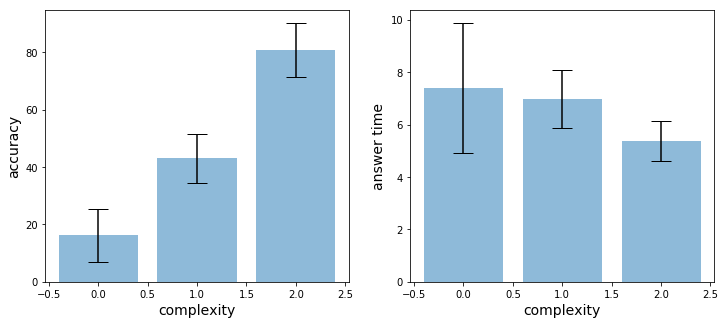

In [30]:
fig, ax = plt.subplots(nrows=1, sharey=False,ncols=2, figsize=(12, 5))
x_pos = np.arange(3)

ax[0].bar(x_pos, acc, yerr=err_acc, align='center', alpha=0.5, ecolor='black', capsize=10)
ax[0].set_xlabel('complexity', fontsize=14)
ax[0].set_ylabel('accuracy', fontsize=14)

ax[1].bar(x_pos, mst, yerr=err_st, align='center', alpha=0.5, ecolor='black', capsize=10)
ax[1].set_xlabel('complexity', fontsize=14)
ax[1].set_ylabel('answer time', fontsize=14)

# Топологические свойства RAT в сети

Загружаем сеть через dataframe и выводим основные характеристики сети:

In [109]:
net=pd.read_excel('assoc_eng2.xlsx')
G0=nx.from_pandas_edgelist(net,'source', 'target', edge_attr=True, create_using=nx.DiGraph())
print('Nodes:',G0.number_of_nodes())
print('Edges:',G0.number_of_edges())
print('Density:',nx.density(G0))
print('Transitivity', nx.transitivity(G0))

('Nodes:', 5019)
('Edges:', 63629)
('Density:', 0.0025264298574940933)
('Transitivity', 0.1228734955845273)


Мы в первую очередь будем интересоваться путями между словами в RAT, поэтому начнем с проверки на связность:

In [32]:
print(nx.is_strongly_connected(G0))
print(len(max(nx.strongly_connected_components(G0), key=len)))

False
4843


В отличие от сети ca-netscience сеть ассоциаций направленна, и для существования путей и алгоритмов распространения активации такое свойство сети оказывается ключевым. Для сравнения посмотрим на ненаправленную сеть, полученнуюи из направленной:

In [33]:
H=G0.to_undirected()
print('Nodes:',H.number_of_nodes())
print('Edges:',H.number_of_edges())
print('Density:',nx.density(H))
print('Transitivity', nx.transitivity(H))

('Nodes:', 5019)
('Edges:', 55246)
('Density:', 0.004387155036449376)
('Transitivity', 0.08342506658206271)


Почему ребер в сети меньше, чем в направленной?)))

поскольку в направленном графе ребро может быть двунаправленной, и он будет считать это ребро как два ребра

In [34]:
print(nx.is_connected(H))
print(len(max(nx.connected_components(H), key=len)))

True
5019


# Задание

1) Исследуйте топологические свойства сети ассоциаций. Помните, что сеть направленная и ряд свойств отличается от анологичных, определенных на ненаправленной сети. 

2) Помимо того что сеть ассоциаций направленна, она еще является взвешенной,т.е. каждое ребро имеет вес. Постройте распределение значений веса ребер. Проанализируйте как изменится топология сети, если убирать ребра малого веса. Для этого можно ввести порог $w_0$ и удалять все связи с весом $w_{i,j}<w_0$. Постройте зависимости топологических характеристик от значения $w_0$. 

3) Исследуйте топологические свойства вершин, входящих в RAT, на сети. Есть ли корреляция между сложностью RAT/временем решения RAT и топологическими свойствами вершин? Придумайте, какие топологические характеристики могут отражать сложность теста. Как можно учесть направленность и взвешенность сети ассоциаций? 

4) Оформите результаты анализа в виде небольшой презентации (3-4 слайда).



# Решение

1) Исследуйте топологические свойства сети ассоциаций. Помните, что сеть направленная и ряд свойств отличается от анологичных, определенных на ненаправленной сети.

In [148]:
net=pd.read_excel('assoc_eng2.xlsx')
G0=nx.from_pandas_edgelist(net,'source', 'target', edge_attr=True, create_using=nx.DiGraph())

In [88]:
A=nx.adjacency_matrix(G0).todense()
print(A)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [108]:
w = 0.05
def cut_the_edge(A,w):
    A1 = A[:]
    for i in range(np.shape(A1)[0]):
        for j in range(np.shape(A1)[1]):
            if A[i,j] < w:
                A1[i,j] = 0
    return A1

In [90]:
G=nx.DiGraph(A1)

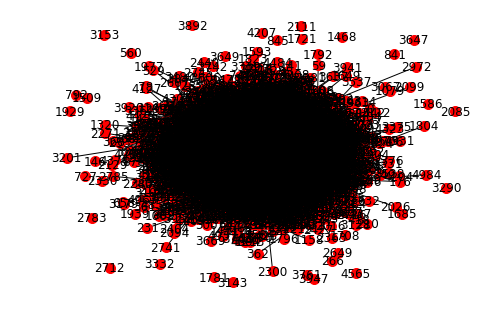

In [62]:
pos=nx.spring_layout(G,iterations=10)
nx.draw(G,pos,node_size=100,with_labels=True) 

In [66]:
print("Number of nodes: %d" % nx.number_of_nodes(G))
print("Number of edges: %d" % nx.number_of_edges(G))
[g1,g2]

Number of nodes: 5019
Number of edges: 28097


In [110]:
w = [float(x)/100 for x in range(0,100,25)]

NameError: name 'linspace' is not defined

In [106]:
edges = []
for i in w:
    A1 = cut_the_edge(A,i)
    G=nx.from_numpy_matrix(A1)
    edges.append(nx.number_of_edges(G))
    print(edges)

[1913]
[1913, 1913]
[1913, 1913, 770]
[1913, 1913, 770, 123]


In [101]:
print('Nodes:',B.number_of_nodes())
print('Edges:',B.number_of_edges())
print('Density:',nx.density(B))
print('Transitivity', nx.transitivity(B))

('Nodes:', 10)
('Edges:', 55)
('Density:', 1.2222222222222223)
('Transitivity', 1.0)


In [4]:
net=pd.read_excel('assoc_eng2.xlsx')
G0=nx.from_pandas_edgelist(net,'source', 'target', edge_attr=True, create_using=nx.DiGraph())

Text(0,0.5,'$Transitivity$')

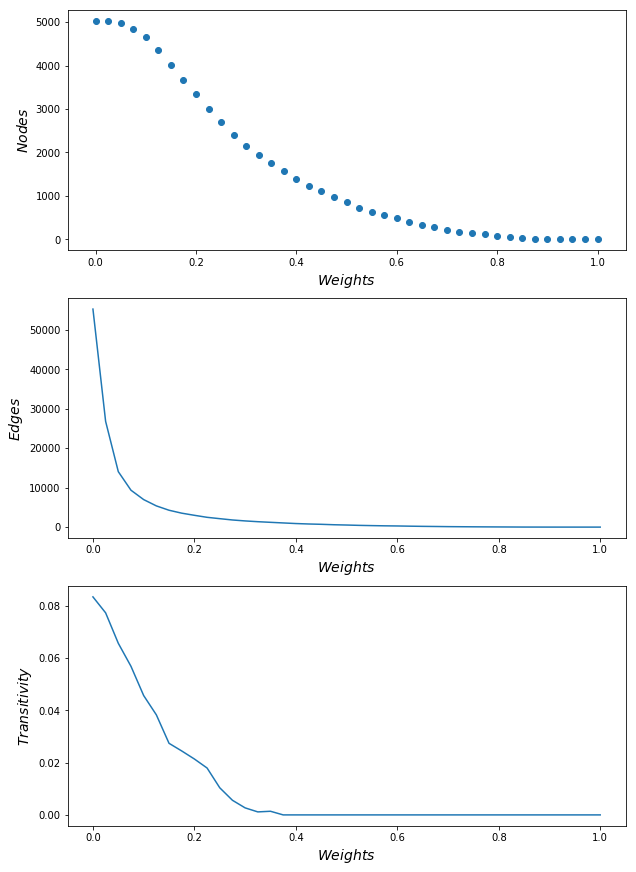

In [7]:
G0 = G0.to_undirected()

GW, nd, edg, trans,pr = graph_destroyer(G0)

fig, ax = plt.subplots(nrows=3, sharey=False,ncols=1, figsize=(10, 15))

ax[0].scatter(pr,nd)
ax[0].set_xlabel(r'$Weights$', fontsize=14)
ax[0].set_ylabel(r'$Nodes$', fontsize=14)

ax[1].plot(pr,edg)
ax[1].set_xlabel(r'$Weights$', fontsize=14)
ax[1].set_ylabel(r'$Edges$', fontsize=14)

ax[2].plot(pr,trans)
ax[2].set_xlabel(r'$Weights$', fontsize=14)
ax[2].set_ylabel(r'$Transitivity$', fontsize=14)


In [6]:

def graph_destroyer(G0):
    GW = []
    H = G0.copy()
    cutted_graphs = []
    pr = np.linspace (0, 1, 41)# веса
    nd, edg, trans = [], [], []
    for t in pr:
        edges = [(otkuda , kuda) for (otkuda , kuda, weight) in H.edges(data=True) if weight['weight']<t]
        H.remove_edges_from(edges)
        isolated = list(nx.isolates(H))
        H.remove_nodes_from(isolated)
        GW.append(H.copy())
        trans.append(nx.transitivity(H))
        nd.append(H.number_of_nodes())
        edg.append(H.number_of_edges())
    return GW, nd, edg, trans, pr

In [184]:
GW, nd, edg, trans,pr = graph_destroyer(G0)
print(nd)

[5019, 5018, 5008, 4975, 4898, 4723, 4509, 4260, 3950, 3635, 3355, 3063, 2796, 2539, 2312, 2101, 1889, 1719, 1565, 1357, 1220, 1065, 937, 832, 741, 623, 527, 441, 348, 283, 232, 186, 140, 87, 44, 36, 16, 8, 2, 0, 0]


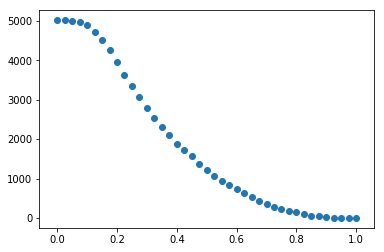

In [185]:
plt.scatter(pr,nd)

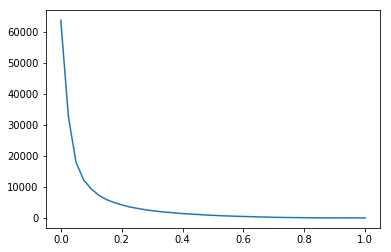

In [190]:
plt.plot(pr,edg)

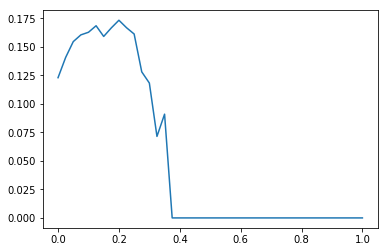

In [189]:
plt.plot(pr,trans)

Text(0,0.5,'$Transitivity$')

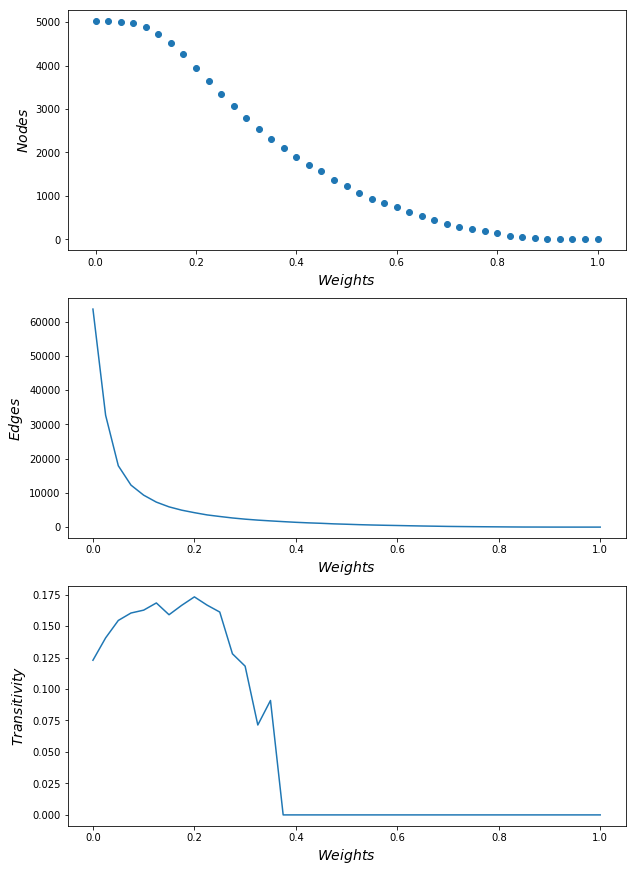

In [197]:
fig, ax = plt.subplots(nrows=3, sharey=False,ncols=1, figsize=(10, 15))

ax[0].scatter(pr,nd)
ax[0].set_xlabel(r'$Weights$', fontsize=14)
ax[0].set_ylabel(r'$Nodes$', fontsize=14)

ax[1].plot(pr,edg)
ax[1].set_xlabel(r'$Weights$', fontsize=14)
ax[1].set_ylabel(r'$Edges$', fontsize=14)

ax[2].plot(pr,trans)
ax[2].set_xlabel(r'$Weights$', fontsize=14)
ax[2].set_ylabel(r'$Transitivity$', fontsize=14)

# Эрдеша – Реньи

In [238]:
ERs = nx.erdos_renyi_graph(1000,0.1)  #случайный граф Эрдеша-Реньи 
ERs_adj_matr = nx.adjacency_matrix(ERs).todense()
Q = np.random.rand(1000,1000)
QT = Q.transpose()
Q = (Q+QT)/2
ERs_adj_matr = np.multiply(ERs_adj_matr,Q)
ERs = nx.from_numpy_matrix(ERs_adj_matr)

In [239]:
GW, nd, edg, trans,pr = graph_destroyer(ERs)

Text(0,0.5,'$Transitivity$')

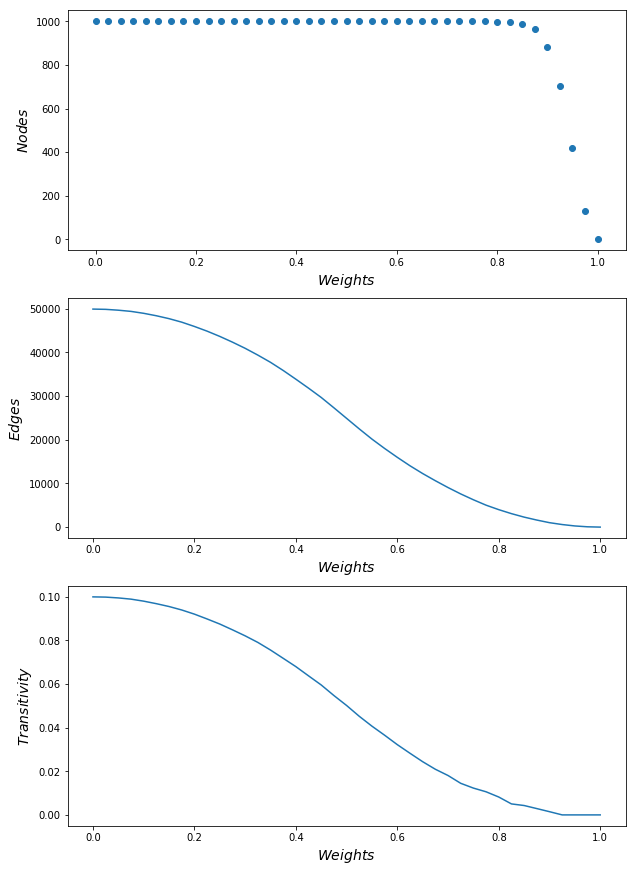

In [240]:
fig, ax = plt.subplots(nrows=3, sharey=False,ncols=1, figsize=(10, 15))

ax[0].scatter(pr,nd)
ax[0].set_xlabel(r'$Weights$', fontsize=14)
ax[0].set_ylabel(r'$Nodes$', fontsize=14)

ax[1].plot(pr,edg)
ax[1].set_xlabel(r'$Weights$', fontsize=14)
ax[1].set_ylabel(r'$Edges$', fontsize=14)

ax[2].plot(pr,trans)
ax[2].set_xlabel(r'$Weights$', fontsize=14)
ax[2].set_ylabel(r'$Transitivity$', fontsize=14)

# Барабаши-Альберта

In [253]:
ERs = nx.barabasi_albert_graph(500,8)  
ERs_adj_matr = nx.adjacency_matrix(ERs).todense()
Q = np.random.rand(500,500)
QT = Q.transpose()
Q = (Q+QT)/2
ERs_adj_matr = np.multiply(ERs_adj_matr,Q)
ERs = nx.from_numpy_matrix(ERs_adj_matr)

In [254]:
GW, nd, edg, trans,pr = graph_destroyer(ERs)

Text(0,0.5,'$Transitivity$')

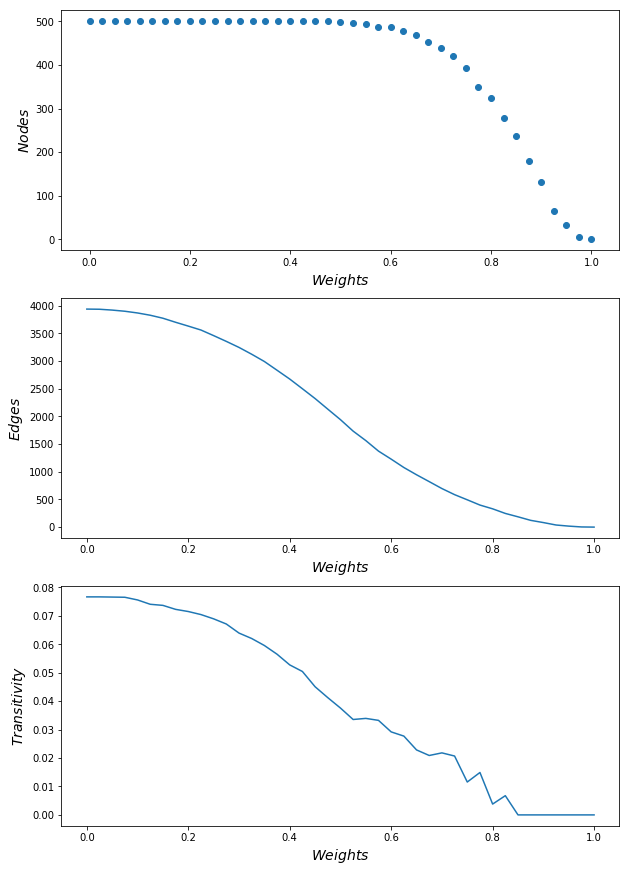

In [255]:
fig, ax = plt.subplots(nrows=3, sharey=False,ncols=1, figsize=(10, 15))

ax[0].scatter(pr,nd)
ax[0].set_xlabel(r'$Weights$', fontsize=14)
ax[0].set_ylabel(r'$Nodes$', fontsize=14)

ax[1].plot(pr,edg)
ax[1].set_xlabel(r'$Weights$', fontsize=14)
ax[1].set_ylabel(r'$Edges$', fontsize=14)

ax[2].plot(pr,trans)
ax[2].set_xlabel(r'$Weights$', fontsize=14)
ax[2].set_ylabel(r'$Transitivity$', fontsize=14)

# Полносвязанный граф со случайнами связями

In [210]:
Q = np.random.rand(100,100)
QT = Q.transpose()
Q = (Q+QT)/2
Q[2,1], Q[1,2]

(0.634075021023162, 0.634075021023162)

In [211]:
ERs=nx.from_numpy_matrix(Q)

In [212]:
GW, nd, edg, trans,pr = graph_destroyer(ERs)

Text(0,0.5,'$Transitivity$')

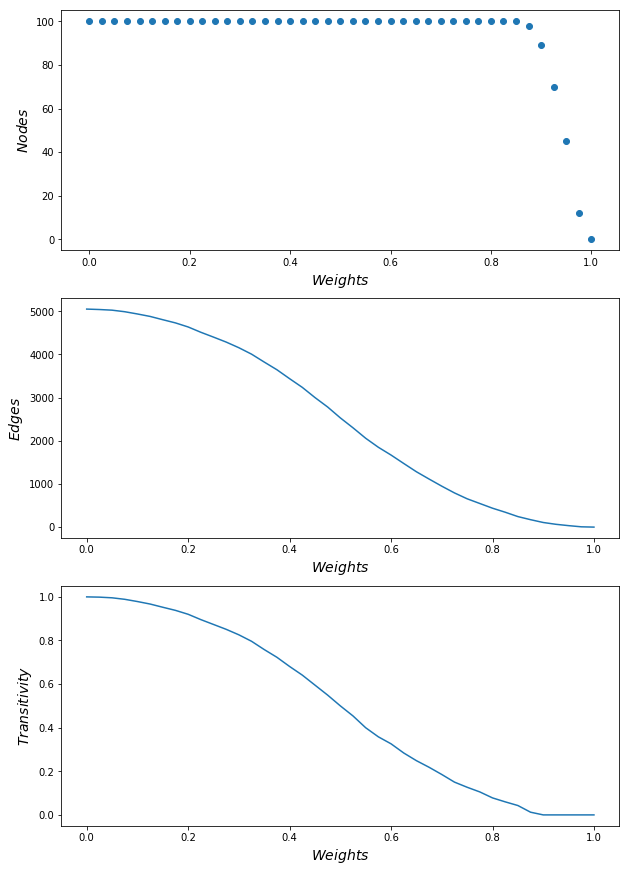

In [213]:
fig, ax = plt.subplots(nrows=3, sharey=False,ncols=1, figsize=(10, 15))

ax[0].scatter(pr,nd)
ax[0].set_xlabel(r'$Weights$', fontsize=14)
ax[0].set_ylabel(r'$Nodes$', fontsize=14)

ax[1].plot(pr,edg)
ax[1].set_xlabel(r'$Weights$', fontsize=14)
ax[1].set_ylabel(r'$Edges$', fontsize=14)

ax[2].plot(pr,trans)
ax[2].set_xlabel(r'$Weights$', fontsize=14)
ax[2].set_ylabel(r'$Transitivity$', fontsize=14)